# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path=r'/Users/kristenlehtinen/Documents/World Happiness Report/'

In [4]:
# Importing merged Data
merged_data= pd.read_csv(r'/Users/kristenlehtinen/Documents/World Happiness Report/02 Data/Original Data/merged world happiness report.csv')

### Data Cleaning

In [5]:
merged_data.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy',
       'Social Support', 'Life Expectancy', 'Freedom', 'Governmental Trust',
       'Generosity'],
      dtype='object')

In [6]:
merged_data.head(20)

,Year,Country,Happiness Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Governmental Trust,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,2015,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,2015,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,2015,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,2015,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,2015,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [7]:
merged_data.shape

(782, 10)

### Missing Values

In [8]:
# Check for missing values

merged_data.isnull().sum()

# No missing values to handle

Year                  0
Country               0
Happiness Rank        0
Happiness Score       0
Economy               0
Social Support        0
Life Expectancy       0
Freedom               0
Governmental Trust    0
Generosity            0
dtype: int64

### Duplicates Check

In [9]:
dups=merged_data.duplicated()

In [10]:
dups.shape #No dups

(782,)

### Extreme Values Check

/var/folders/ct/3q0tp4n574b6w7_tt9fvsllh0000gp/T/ipykernel_88746/4078521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data['Economy'], bins=25) # Shows extreme values
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Economy', ylabel='Density'>

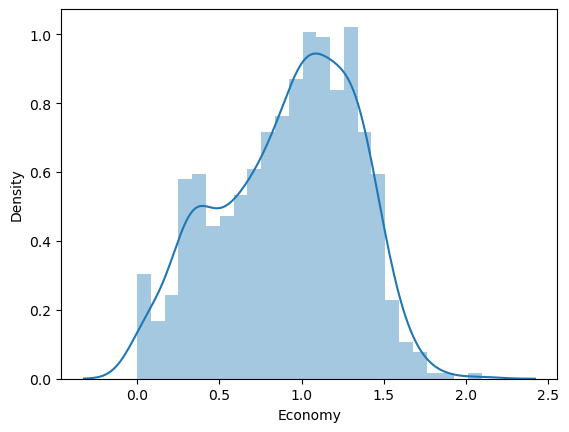

In [11]:
sns.distplot(merged_data['Economy'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
merged_data['Economy'].mean() #Check the mean

0.9160474824757033

In [13]:
merged_data['Economy'].median() #Check the median

0.982204709

In [14]:
merged_data['Economy'].max() #Check the max

2.096

## Hypothesis: The higher the economy score, the greater life expectancy will be. 

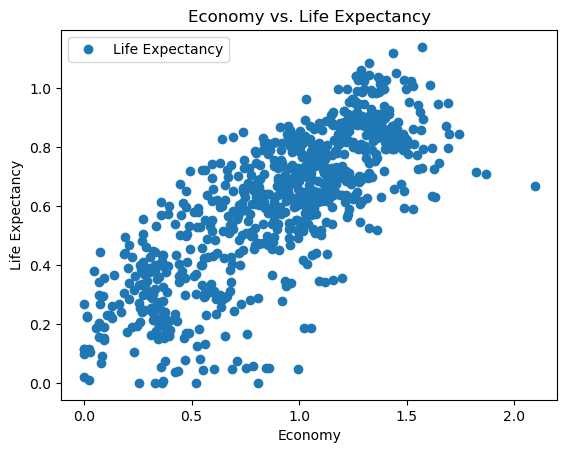

In [16]:
# Data Prep for regression analysis

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

merged_data.plot(x = 'Economy', y='Life Expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economy vs. Life Expectancy')  
plt.xlabel('Economy')  
plt.ylabel('Life Expectancy')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = merged_data['Economy'].values.reshape(-1,1)
y = merged_data['Life Expectancy'].values.reshape(-1,1)

In [19]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [20]:
y

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.86179   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.76276   ],
       [0.72052   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.84483   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.8753    ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.78902   ],
       [0.99111   ],
       [0.96538   ],
       [0.790

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

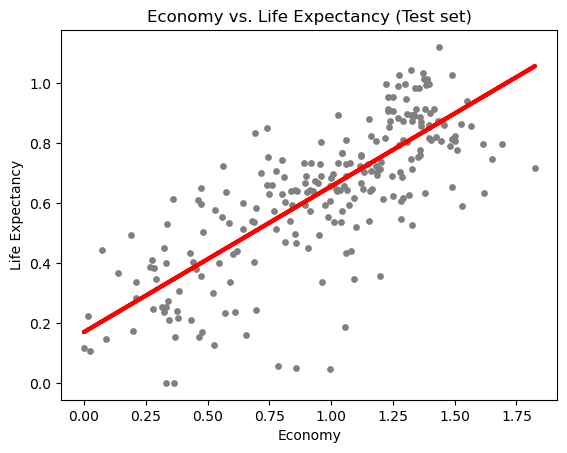

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy vs. Life Expectancy (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.48667733]]
Mean squared error:  0.024890054187842254
R2 score:  0.5749863760749456


In [30]:
y_predicted

array([[0.70603737],
       [0.8501897 ],
       [0.91473458],
       [0.8484912 ],
       [0.30861518],
       [0.73283871],
       [0.35718557],
       [0.53013609],
       [0.8635198 ],
       [0.74725258],
       [0.68650065],
       [0.73675495],
       [0.34453196],
       [0.61463788],
       [0.17726096],
       [0.83144289],
       [0.40156105],
       [0.60811481],
       [0.71535088],
       [0.58723756],
       [1.05764565],
       [0.20534225],
       [0.44916759],
       [0.83266932],
       [0.99250389],
       [0.83753609],
       [0.76794124],
       [0.84288954],
       [0.3796143 ],
       [0.82974926],
       [0.97234571],
       [0.8696568 ],
       [0.72814563],
       [0.26277017],
       [0.8394828 ],
       [0.6613589 ],
       [0.18246841],
       [0.67763826],
       [0.79822007],
       [0.75958499],
       [0.33053512],
       [0.84876209],
       [0.53238941],
       [0.68616971],
       [0.81709565],
       [0.77824906],
       [0.74555408],
       [0.565

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.520169,0.706037
1,0.819000,0.850190
2,0.590148,0.914735
3,0.861790,0.848491
4,0.382150,0.308615
5,0.639333,0.732839
6,0.308000,0.357186
7,0.661570,0.530136
8,0.819590,0.863520
9,0.705240,0.747253


### Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.48667733]]
Mean squared error:  0.023215515977168904
R2 score:  0.6296012251432501


#### Original Regression 
Slope: [[0.48667733]]
Mean squared error:  0.024890054187842254
R2 score:  0.5749863760749456
    
Test Regression 
Slope: [[0.48667733]]
Mean squared error:  0.023215515977168904
R2 score:  0.6296012251432501
    
The test regression performed very closely to the original regression. The test regression does not alter the output. 

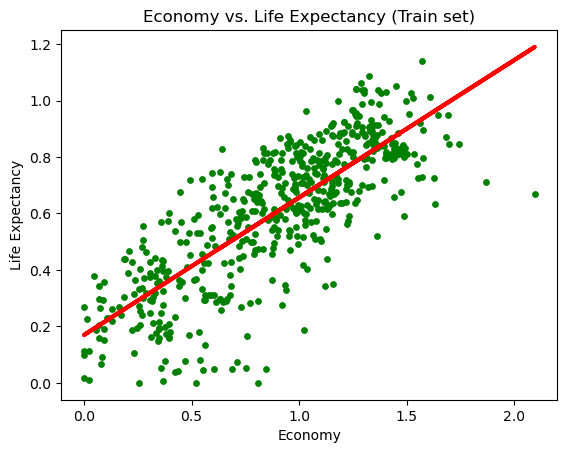

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Economy vs. Life Expectancy (Train set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Life Expectancy')
plot_test.show()

### Removing Outliers

In [55]:
# Clean the extreme values in Economy
df_test1 = merged_data[merged_data['Economy'] <=10] 

In [56]:
# Clean the extreme values in Life Expectancy
df_test2 = merged_data[merged_data['Life Expectancy'] <=10] 

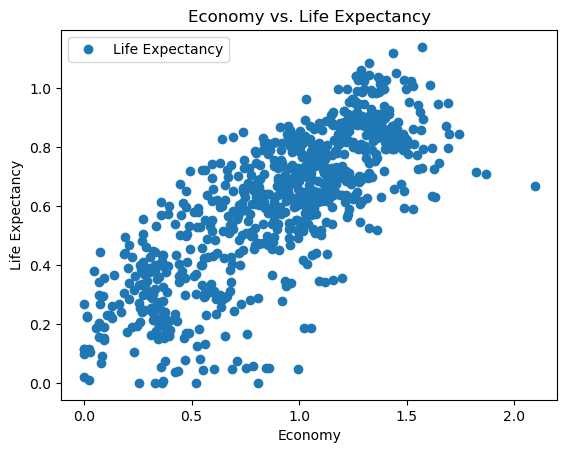

In [57]:
# See how the scatterplot looks without outliers.

df_test1.plot(x = 'Economy', y='Life Expectancy', style='o')  
plt.title('Economy vs. Life Expectancy')  
plt.xlabel('Economy')  
plt.ylabel('Life Expectancy')  
plt.show()

In [60]:
# Reshape again.

X_2 = df_test1['Economy'].values.reshape(-1,1)
y_2 = df_test2['Life Expectancy'].values.reshape(-1,1)

In [61]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [62]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [63]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [64]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [65]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.48667733]]
Mean squared error:  0.024890054187842254
R2 score:  0.5749863760749456


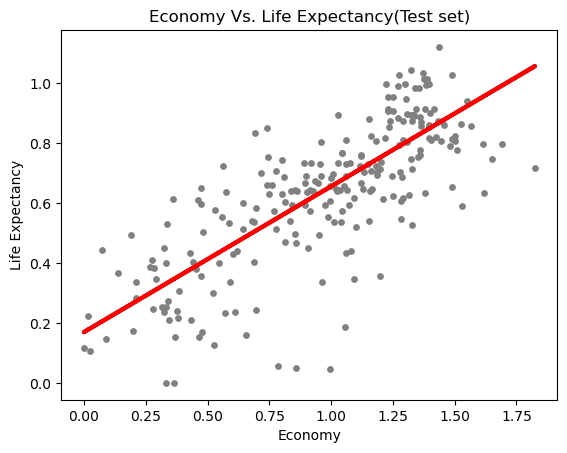

In [66]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Economy Vs. Life Expectancy(Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [67]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.520169,0.706037
1,0.819000,0.850190
2,0.590148,0.914735
3,0.861790,0.848491
4,0.382150,0.308615
5,0.639333,0.732839
6,0.308000,0.357186
7,0.661570,0.530136
8,0.819590,0.863520
9,0.705240,0.747253


#### Possible Data Bias
The countries are the ones reporting their data, so there is potential for reporting bias. A country may increase the numbers of their Economy in order to look better on the World Happiness Report.  